In [210]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

In [211]:
depth_path='depth_dic.json'
lane_path='exact_position3.json'

with open(depth_path, 'r', encoding='utf-8') as json_file:
    depth = json.load(json_file)
with open(lane_path, 'r', encoding='utf-8') as json_file:
    lane = json.load(json_file)

In [212]:
len(depth['vehicle0'])

132

In [213]:
lane

{'vehicle0': [[0, 2.6587297791382047],
  [1, 2.6581542661028426],
  [2, 2.6628826721664085],
  [3, 2.6756813395157937],
  [4, 2.6977789539866346],
  [5, 2.7278791924669523],
  [6, 2.762201624079343],
  [7, 2.7956483821588898],
  [8, 2.823477725553537],
  [9, 2.8426991623126914],
  [10, 2.8526292988414474],
  [11, 2.8545995183282384],
  [12, 2.8511562657496294],
  [13, 2.845171840759481],
  [14, 2.8391391051969177],
  [15, 2.8349063696871966],
  [16, 2.8334977967462818],
  [17, 2.8351811146649366],
  [18, 2.839457663774203],
  [19, 2.845035551362752],
  [20, 2.849970157409233],
  [21, 2.8522029305553604],
  [22, 2.850626517306707],
  [23, 2.8463444062181575],
  [24, 2.843343192757227],
  [25, 2.847768823475924],
  [26, 2.8657986104650552],
  [27, 2.9009360943199924],
  [28, 2.9524308132689265],
  [29, 3.0155036088369584],
  [30, 3.0833467327971777],
  [31, 3.1496074183229763],
  [32, 3.2102563063406873],
  [33, 3.2641590669634533],
  [34, 3.3122879105852654],
  [35, 3.356072524016017],


In [214]:
# 기존 데이터

# 변환된 데이터를 저장할 딕셔너리
lane_data = {}

max_frame=0

for vehicle, entries in lane.items():
    if len(entries)>max_frame:
        max_frame=len(entries)

for vehicle, entries in lane.items():    
    # None으로 초기화된 리스트 생성 (0~max_frame)
    vehicle_data = [None] * (max_frame + 1)
    
    # 주어진 데이터로 채우기
    for entry in entries:
        frame, lane_ratio = entry[0], entry[1]
        vehicle_data[frame] = lane_ratio
    
    # 결과 저장
    lane_data[vehicle] = vehicle_data[:len(depth['vehicle8'])]


In [215]:
depth

{'vehicle8': [81.69091029653714,
  81.88303476377095,
  82.25735540195294,
  82.79584808328744,
  83.47550120214117,
  84.27181025798767,
  85.16177119381771,
  86.1257775366195,
  87.1482499355298,
  88.21720158403558,
  89.32315378955245,
  90.45784368325788,
  91.6130657996995,
  92.77984132211542,
  93.94797705936058,
  95.1059905942656,
  96.24133900252367,
  97.340869556611,
  98.3914743272835,
  99.380853444694,
  100.29832836389939,
  101.13571692159539,
  101.88819279239088,
  102.5550721536583,
  103.1404563173455,
  103.65364765841932,
  104.10925212730999,
  104.5268898823458,
  104.93045981794555,
  105.34694488225007,
  105.80480020395518,
  106.33202824028912,
  106.95410419901685,
  107.69195915958304,
  108.56024686585218,
  109.56610588821873,
  110.70858019595438,
  111.97878321596657,
  113.36079443971968,
  114.83317914893361,
  116.37093781953816,
  117.94763719309117,
  119.5374597763908,
  121.11693540977302,
  122.66618245755035,
  124.16957510423586,
  125.615

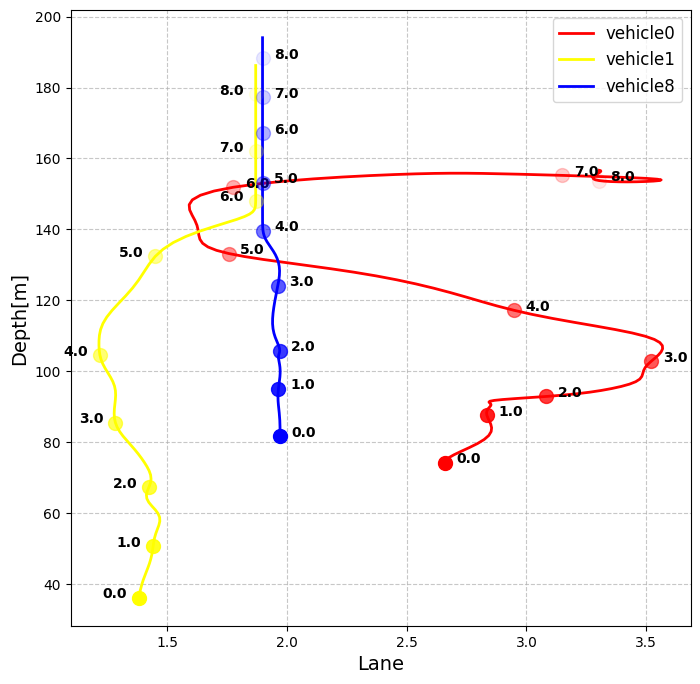

In [244]:
import matplotlib.pyplot as plt

# 그래프 만들기
plt.figure(figsize=(8, 8))  # 가로 8, 세로 8 크기 설정
colors=['red', 'yellow', 'blue']
texts=[0.1, -0.1, +0.1]
count=0
for vehicle in lane_data.keys():
    # 데이터 추출
    y_values = depth[vehicle]  # y축 데이터
    x_values = lane_data[vehicle]  # x축 데이터

    # 선 그래프 그리기
    plt.plot(x_values, y_values, label=vehicle, linewidth=2, color=colors[count])

    for i in range(0, len(x_values), 15):  # 15 프레임 간격
        alpha_value = 1 - (i / len(x_values))  # i 값이 커지면 alpha는 작아짐
        plt.scatter(x_values[i], y_values[i], color=colors[count], s=100, zorder=5, alpha=alpha_value)  # 점 추가
        
        # 텍스트를 점 위에 추가 (약간 위로 이동)
        plt.text(x_values[i]+texts[count], y_values[i] + 1, str(round(i / 15, 1)), color='black', fontsize=10, ha='center', va='center', fontweight='bold')
    
    count += 1

# 범례와 기타 설정
plt.legend(fontsize=12)  # 범례 추가
plt.xlabel("Lane", fontsize=14)
plt.ylabel("Depth[m]", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [255]:
## data augmentation 한 부분 출력

In [256]:
depth_path='multiplied_n_depth_dic.json'
lane_path='exact_position3.json'

with open(depth_path, 'r', encoding='utf-8') as json_file:
    depth = json.load(json_file)
with open(lane_path, 'r', encoding='utf-8') as json_file:
    lane = json.load(json_file)

In [257]:
# 기존 데이터

# 변환된 데이터를 저장할 딕셔너리
lane_data = {}

max_frame=0

for vehicle, entries in lane.items():
    if len(entries)>max_frame:
        max_frame=len(entries)

for vehicle, entries in lane.items():    
    # None으로 초기화된 리스트 생성 (0~max_frame)
    vehicle_data = [None] * (max_frame + 1)
    
    # 주어진 데이터로 채우기
    for entry in entries:
        frame, lane_ratio = entry[0], entry[1]
        vehicle_data[frame] = lane_ratio
    
    # 결과 저장
    lane_data[vehicle] = vehicle_data[:len(depth['vehicle8'])]


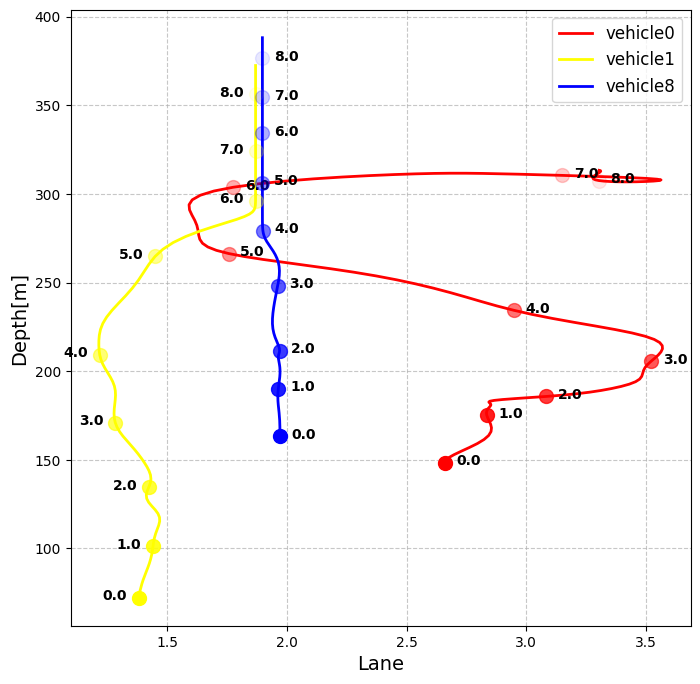

In [258]:
import matplotlib.pyplot as plt

# 그래프 만들기
plt.figure(figsize=(8, 8))  # 가로 8, 세로 8 크기 설정
colors=['red', 'yellow', 'blue']
texts=[0.1, -0.1, +0.1]
count=0
for vehicle in lane_data.keys():
    # 데이터 추출
    y_values = depth[vehicle]  # y축 데이터
    x_values = lane_data[vehicle]  # x축 데이터

    # 선 그래프 그리기
    plt.plot(x_values, y_values, label=vehicle, linewidth=2, color=colors[count])

    for i in range(0, len(x_values), 15):  # 15 프레임 간격
        alpha_value = 1 - (i / len(x_values))  # i 값이 커지면 alpha는 작아짐
        plt.scatter(x_values[i], y_values[i], color=colors[count], s=100, zorder=5, alpha=alpha_value)  # 점 추가
        
        # 텍스트를 점 위에 추가 (약간 위로 이동)
        plt.text(x_values[i]+texts[count], y_values[i] + 1, str(round(i / 15, 1)), color='black', fontsize=10, ha='center', va='center', fontweight='bold')
    
    count += 1

# 범례와 기타 설정
plt.legend(fontsize=12)  # 범례 추가
plt.xlabel("Lane", fontsize=14)
plt.ylabel("Depth[m]", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [259]:
## 강소은 꺼

In [260]:
depth_path='changed_depth_dic.json'
lane_path='exact_position3.json'

with open(depth_path, 'r', encoding='utf-8') as json_file:
    depth = json.load(json_file)
with open(lane_path, 'r', encoding='utf-8') as json_file:
    lane = json.load(json_file)

In [261]:
# 기존 데이터

# 변환된 데이터를 저장할 딕셔너리
lane_data = {}

max_frame=0

for vehicle, entries in lane.items():
    if len(entries)>max_frame:
        max_frame=len(entries)

for vehicle, entries in lane.items():    
    # None으로 초기화된 리스트 생성 (0~max_frame)
    vehicle_data = [None] * (max_frame + 1)
    
    # 주어진 데이터로 채우기
    for entry in entries:
        frame, lane_ratio = entry[0], entry[1]
        vehicle_data[frame] = lane_ratio
    
    # 결과 저장
    lane_data[vehicle] = vehicle_data[:len(depth['vehicle8'])]


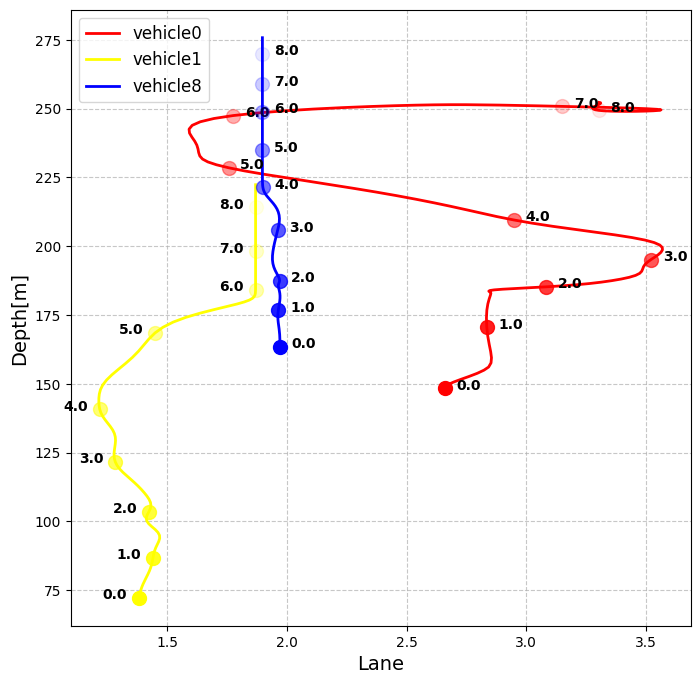

In [262]:
import matplotlib.pyplot as plt

# 그래프 만들기
plt.figure(figsize=(8, 8))  # 가로 8, 세로 8 크기 설정
colors=['red', 'yellow', 'blue']
texts=[0.1, -0.1, +0.1]
count=0
for vehicle in lane_data.keys():
    # 데이터 추출
    y_values = depth[vehicle]  # y축 데이터
    x_values = lane_data[vehicle]  # x축 데이터

    # 선 그래프 그리기
    plt.plot(x_values, y_values, label=vehicle, linewidth=2, color=colors[count])

    for i in range(0, len(x_values), 15):  # 15 프레임 간격
        alpha_value = 1 - (i / len(x_values))  # i 값이 커지면 alpha는 작아짐
        plt.scatter(x_values[i], y_values[i], color=colors[count], s=100, zorder=5, alpha=alpha_value)  # 점 추가
        
        # 텍스트를 점 위에 추가 (약간 위로 이동)
        plt.text(x_values[i]+texts[count], y_values[i] + 1, str(round(i / 15, 1)), color='black', fontsize=10, ha='center', va='center', fontweight='bold')
    
    count += 1

# 범례와 기타 설정
plt.legend(fontsize=12)  # 범례 추가
plt.xlabel("Lane", fontsize=14)
plt.ylabel("Depth[m]", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
## 앞 뒤 박는 거

In [280]:
depth_path='changed_depth_dic1.json'
lane_path='exact_position3.json'

with open(depth_path, 'r', encoding='utf-8') as json_file:
    depth = json.load(json_file)
with open(lane_path, 'r', encoding='utf-8') as json_file:
    lane = json.load(json_file)

In [281]:
# 기존 데이터

# 변환된 데이터를 저장할 딕셔너리
lane_data = {}

max_frame=0

for vehicle, entries in lane.items():
    if len(entries)>max_frame:
        max_frame=len(entries)

for vehicle, entries in lane.items():    
    # None으로 초기화된 리스트 생성 (0~max_frame)
    vehicle_data = [None] * (max_frame + 1)
    
    # 주어진 데이터로 채우기
    for entry in entries:
        frame, lane_ratio = entry[0], entry[1]
        vehicle_data[frame] = lane_ratio
    
    # 결과 저장
    lane_data[vehicle] = vehicle_data[:len(depth['vehicle8'])]


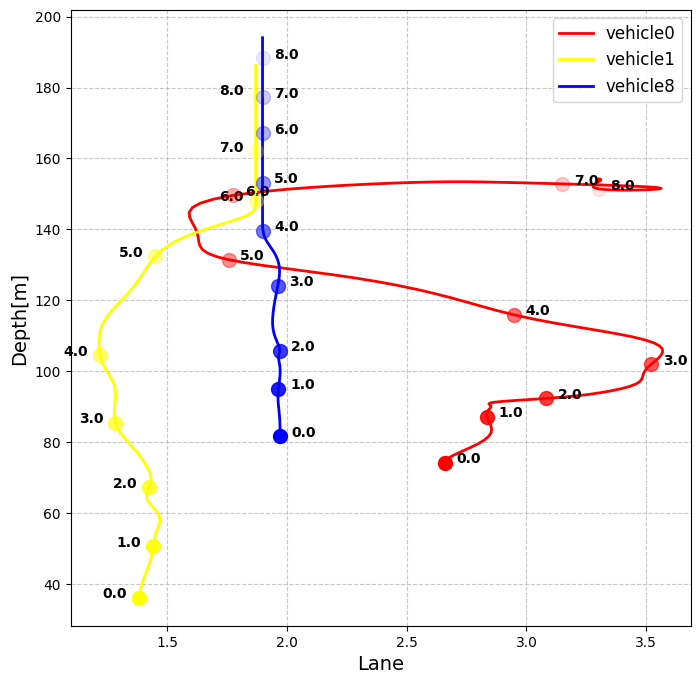

In [282]:
import matplotlib.pyplot as plt

# 그래프 만들기
plt.figure(figsize=(8, 8))  # 가로 8, 세로 8 크기 설정
colors=['red', 'yellow', 'blue']
texts=[0.1, -0.1, +0.1]
count=0
for vehicle in lane_data.keys():
    # 데이터 추출
    y_values = depth[vehicle]  # y축 데이터
    x_values = lane_data[vehicle]  # x축 데이터

    # 선 그래프 그리기
    plt.plot(x_values, y_values, label=vehicle, linewidth=2, color=colors[count])

    for i in range(0, len(x_values), 15):  # 15 프레임 간격
        alpha_value = 1 - (i / len(x_values))  # i 값이 커지면 alpha는 작아짐
        plt.scatter(x_values[i], y_values[i], color=colors[count], s=100, zorder=5, alpha=alpha_value)  # 점 추가
        
        # 텍스트를 점 위에 추가 (약간 위로 이동)
        plt.text(x_values[i]+texts[count], y_values[i] + 1, str(round(i / 15, 1)), color='black', fontsize=10, ha='center', va='center', fontweight='bold')
    
    count += 1

# 범례와 기타 설정
plt.legend(fontsize=12)  # 범례 추가
plt.xlabel("Lane", fontsize=14)
plt.ylabel("Depth[m]", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [289]:
depth_path='changed_depth_dic2.json'
lane_path='exact_position3.json'

with open(depth_path, 'r', encoding='utf-8') as json_file:
    depth = json.load(json_file)
with open(lane_path, 'r', encoding='utf-8') as json_file:
    lane = json.load(json_file)

In [290]:
depth

{'vehicle1': [36.11730026253573,
  36.33465618064026,
  36.75788737162141,
  37.36600146986935,
  38.1318636320024,
  39.02605358474599,
  40.020291626255755,
  41.089801890393296,
  42.214403112779266,
  43.37849435182585,
  44.570319903414656,
  45.78093425308093,
  47.00319797242637,
  48.23099740414335,
  49.458756594379395,
  50.681227422979426,
  51.89350299480522,
  53.09117429542262,
  54.27060562935525,
  55.42922088832633,
  56.56572859993377,
  57.68029235088097,
  58.77458243047273,
  59.851692025029685,
  60.91591906819068,
  61.97243306315101,
  63.026861685026006,
  64.08484230841385,
  65.15158745451049,
  66.23151037959875,
  67.32794850684878,
  68.44300968650619,
  69.57755120790698,
  70.73128594258108,
  71.90299566602978,
  73.0908199394583,
  74.29258110861227,
  75.50610285660618,
  76.72948178036314,
  77.96127856149387,
  79.20060675594364,
  80.44711166503063,
  81.70084727945195,
  82.9620737707351,
  84.23100939078132,
  85.50757735355788,
  86.791189462351

In [291]:
# 기존 데이터

# 변환된 데이터를 저장할 딕셔너리
lane_data = {}

max_frame=0

for vehicle, entries in lane.items():
    if len(entries)>max_frame:
        max_frame=len(entries)

for vehicle, entries in lane.items():    
    # None으로 초기화된 리스트 생성 (0~max_frame)
    vehicle_data = [None] * (max_frame + 1)
    
    # 주어진 데이터로 채우기
    for entry in entries:
        frame, lane_ratio = entry[0], entry[1]
        vehicle_data[frame] = lane_ratio
    
    # 결과 저장
    lane_data[vehicle] = vehicle_data[:len(depth['vehicle8'])]


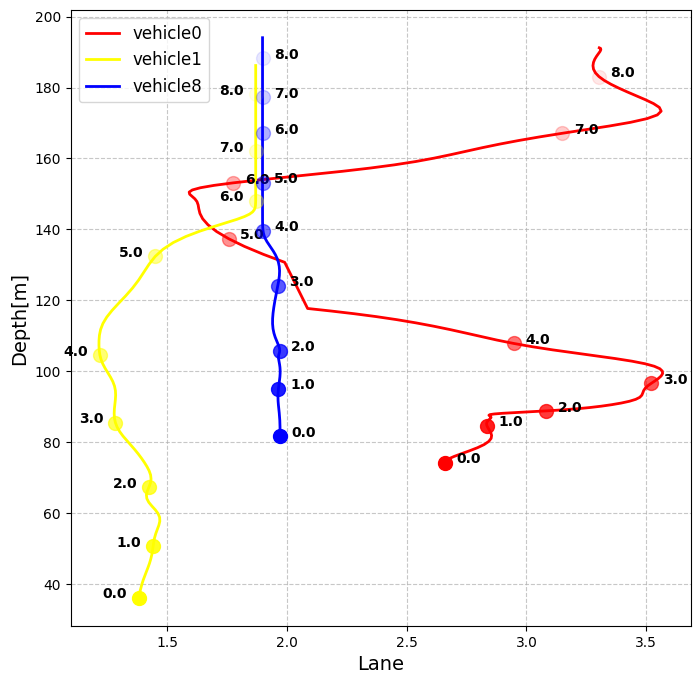

In [292]:
import matplotlib.pyplot as plt

# 그래프 만들기
plt.figure(figsize=(8, 8))  # 가로 8, 세로 8 크기 설정
colors=['red', 'yellow', 'blue']
texts=[0.1, -0.1, +0.1]
count=0
for vehicle in lane_data.keys():
    # 데이터 추출
    y_values = depth[vehicle]  # y축 데이터
    x_values = lane_data[vehicle]  # x축 데이터

    # 선 그래프 그리기
    plt.plot(x_values, y_values, label=vehicle, linewidth=2, color=colors[count])

    for i in range(0, len(x_values), 15):  # 15 프레임 간격
        alpha_value = 1 - (i / len(x_values))  # i 값이 커지면 alpha는 작아짐
        plt.scatter(x_values[i], y_values[i], color=colors[count], s=100, zorder=5, alpha=alpha_value)  # 점 추가
        
        # 텍스트를 점 위에 추가 (약간 위로 이동)
        plt.text(x_values[i]+texts[count], y_values[i] + 1, str(round(i / 15, 1)), color='black', fontsize=10, ha='center', va='center', fontweight='bold')
    
    count += 1

# 범례와 기타 설정
plt.legend(fontsize=12)  # 범례 추가
plt.xlabel("Lane", fontsize=14)
plt.ylabel("Depth[m]", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
